In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

local


In [2]:
train_data = kgs.load_all_train_data()
kgs.debugging_mode = 2

In [3]:
# import ariel_load
# importlib.reload(ariel_load)

# def scale_diff(a,b):
#     for ii in range(a.shape[1]):
#         a[:,ii]/=kgs.rms(a[:,ii])
#         b[:,ii]/=kgs.rms(b[:,ii])
#     return a-b    
# for dd in train_data[:1]:
#     loaders = ariel_load.default_loaders()
#     loaders[0].cache_steps = []

#     d = copy.deepcopy(dd)
#     d.load_to_step(5, loaders)
#     ref = copy.deepcopy(d.transits[0].data[1].data)
    
#     d = copy.deepcopy(dd)
#     d.load_to_step(3, loaders)
#     d.transits[0].data[1].data[:,15,::3] = cp.nan
#     d.transits[0].data[1].data[:,16,1::3] = cp.nan
#     d.transits[0].data[1].data[:,17,2::3] = cp.nan
#     options = ariel_load.apply_pca_modelOptions()
#     options.include_diagnostics = True
#     v=[]
#     plt.figure()
#     for nc in range(2,5):
#         options.n_components = nc
#         weighted_coeffs, residual = ariel_load.apply_pca_model(d.transits[0].data[1].data, np.arange(1,283), options)
#         #r = weighted_coeffs/kgs.rms(weighted_coeffs)
#         #_,ax = plt.subplots(1,2,figsize=(12,6))
#         #plot_scaled(weighted_coeffs)
#         #v.append(ariel_numerics.estimate_noise_cp(weighted_coeffs).get())
#         # plt.figure()
#         # plt.imshow((weighted_coeffs-cp.mean(weighted_coeffs,0)).get(), aspect='auto', interpolation='none')
#         # plt.colorbar()
#         # plt.title(nc)
#         plt.figure()
#         plt.imshow(scale_diff(weighted_coeffs,ref).get(), aspect='auto', interpolation='none')
#         plt.colorbar()
#         plt.title(nc)
#         #plt.clim([-1e-2,1e-2])
#     d.load_to_step(5, loaders)   
#     plt.figure()
#     plt.imshow(scale_diff(d.transits[0].data[1].data,ref).get(), aspect='auto', interpolation='none')
#     plt.colorbar()
#     plt.title(nc)
#     #plt.clim([-1e-2,1e-2])
#     # plot_scaled(d.transits[0].data[0].data)   
#     # v.append(ariel_numerics.estimate_noise_cp(d.transits[0].data[0].data).get())
#     # plt.figure()
#     # plt.plot(v)
#     plt.pause(0.001)

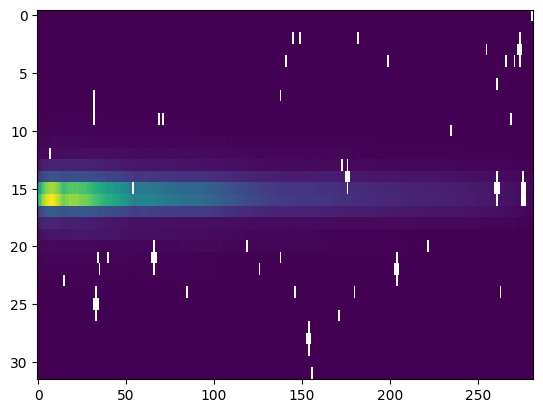

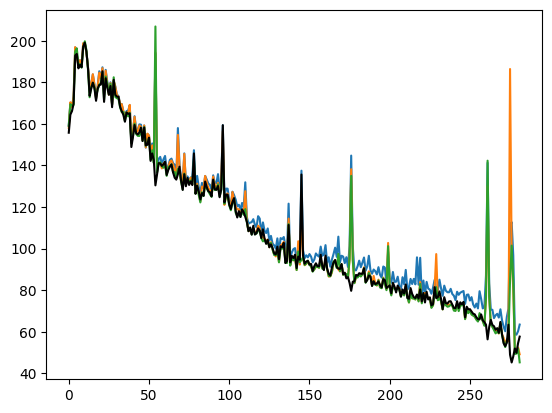

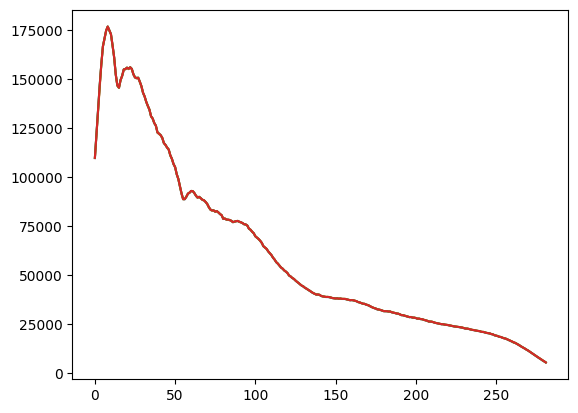

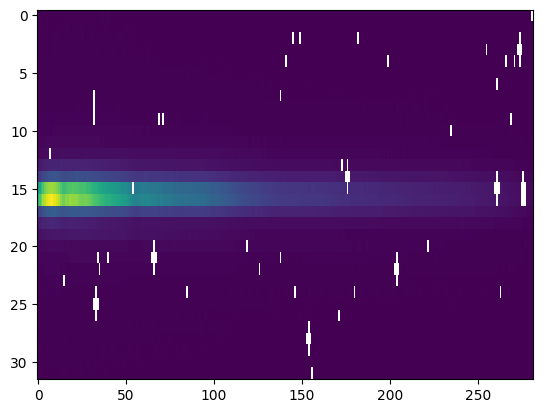

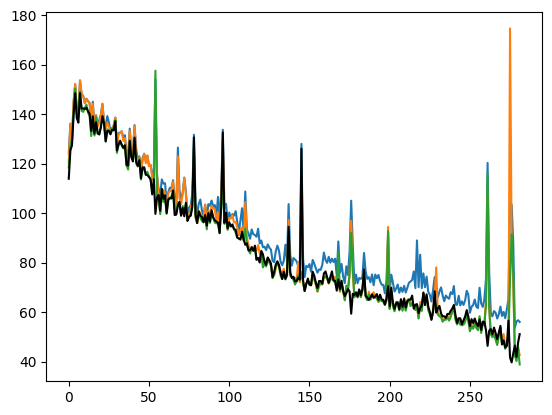

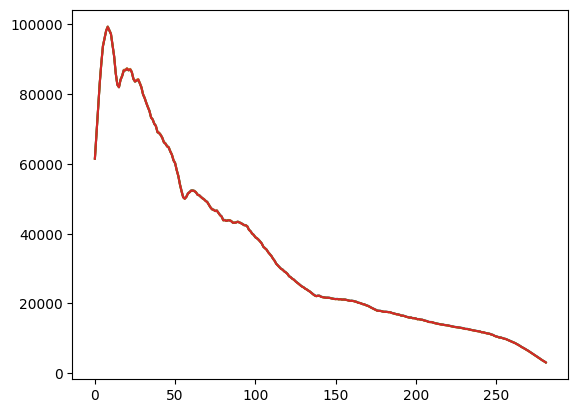

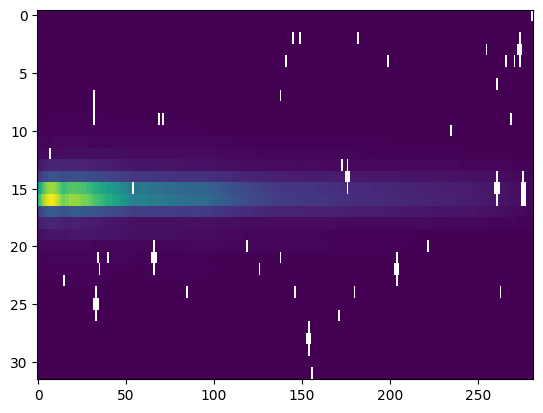

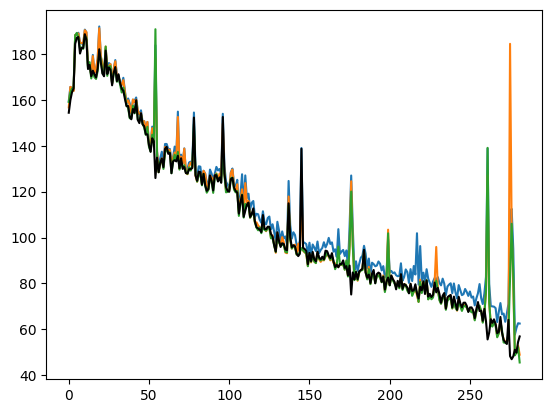

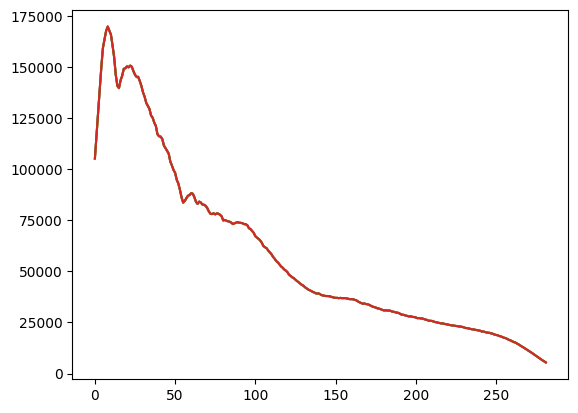

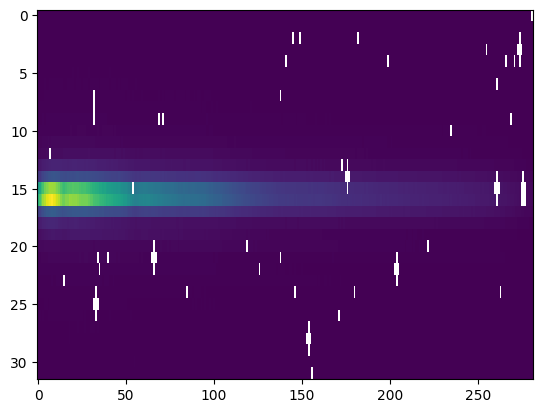

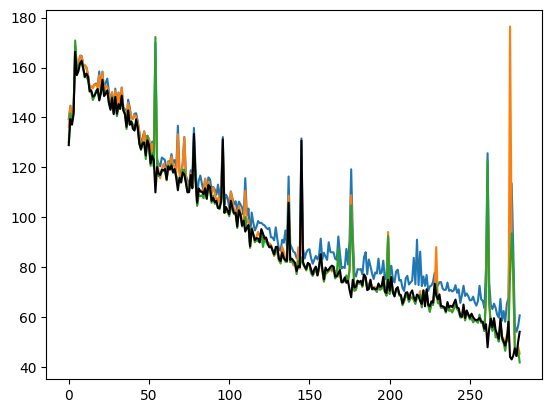

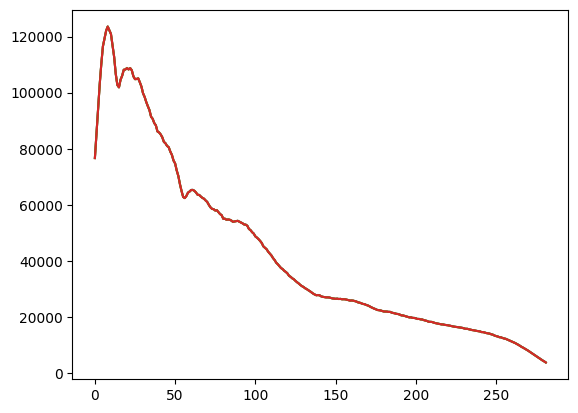

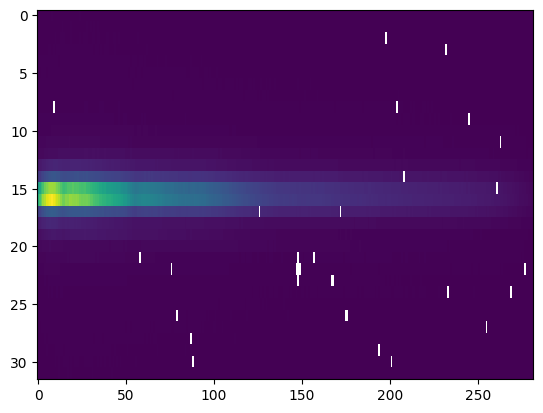

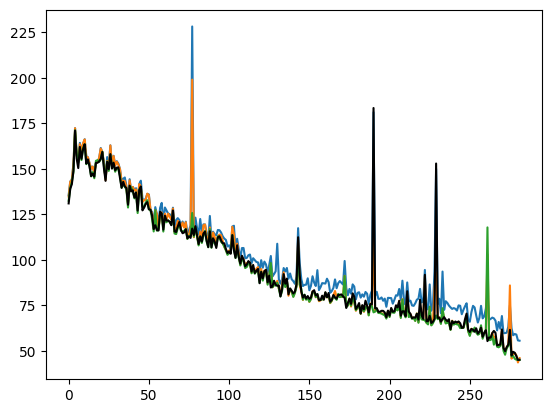

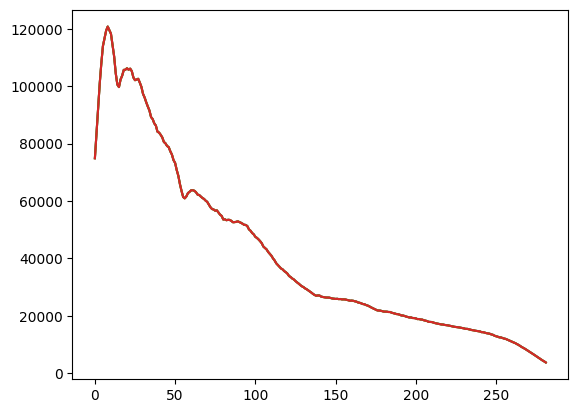

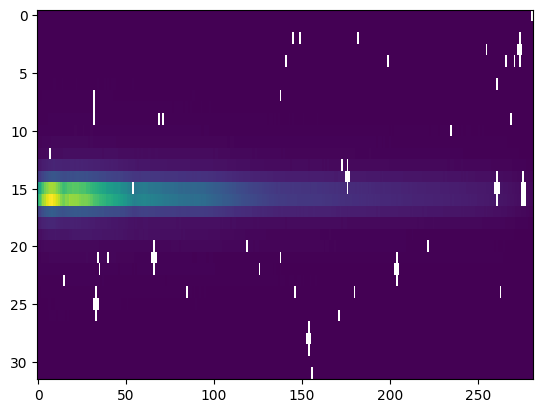

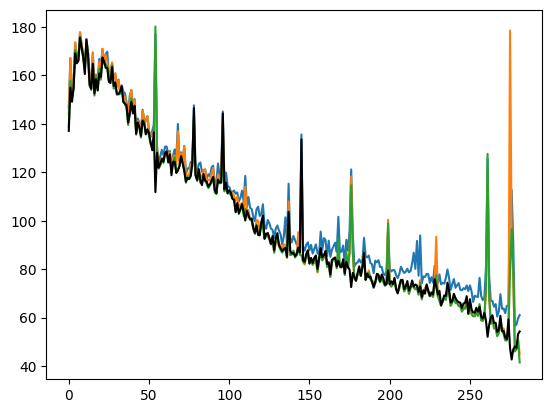

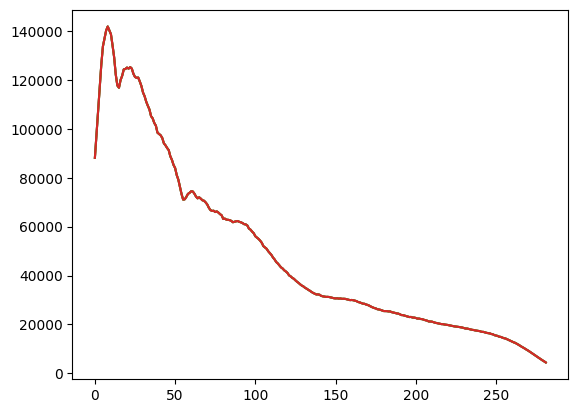

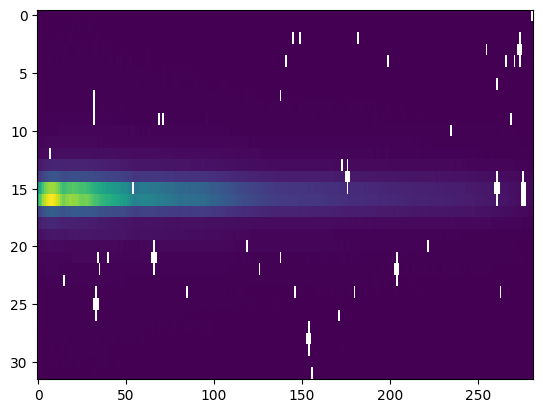

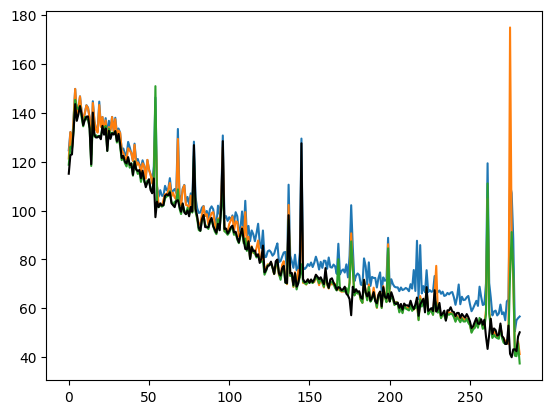

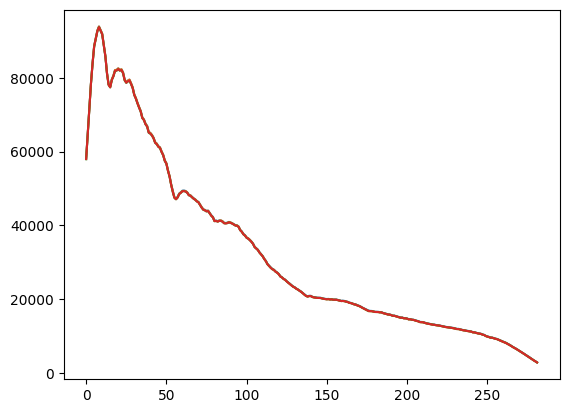

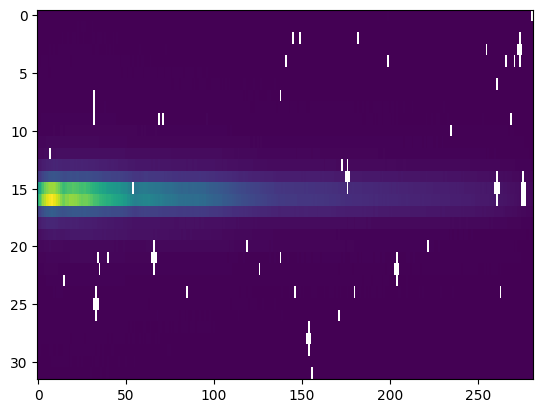

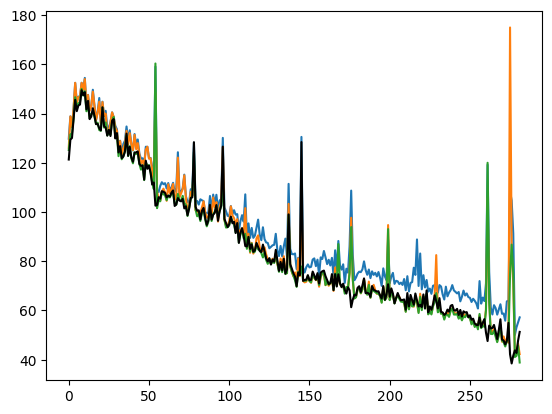

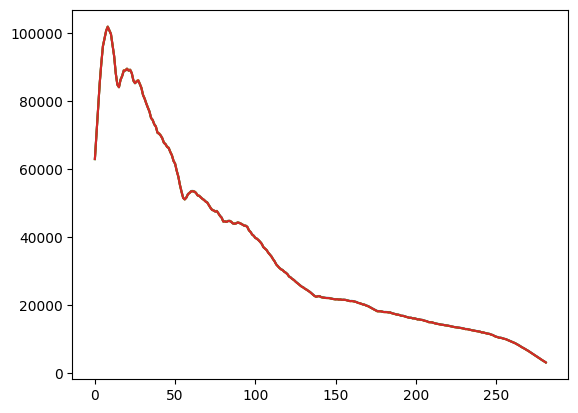

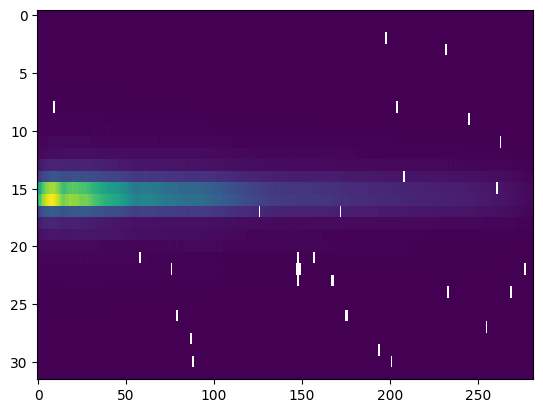

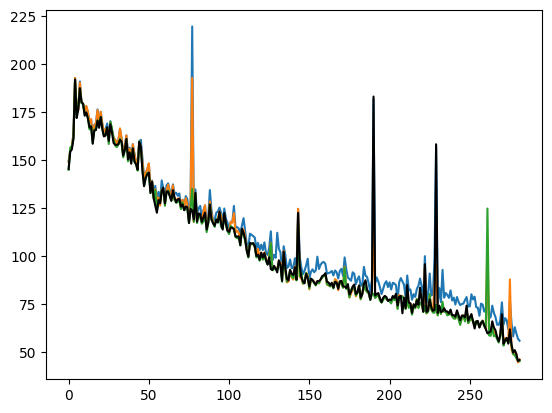

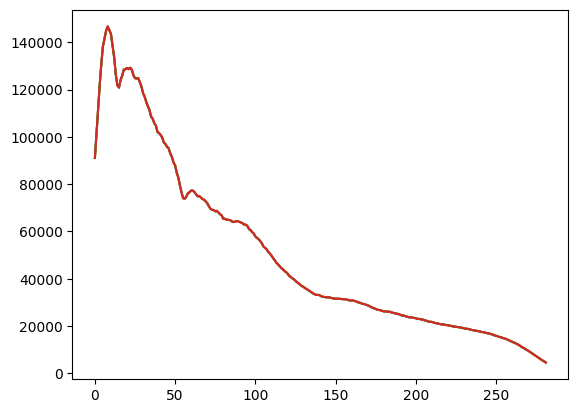

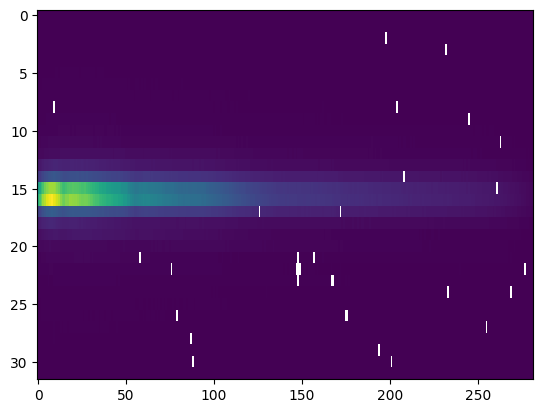

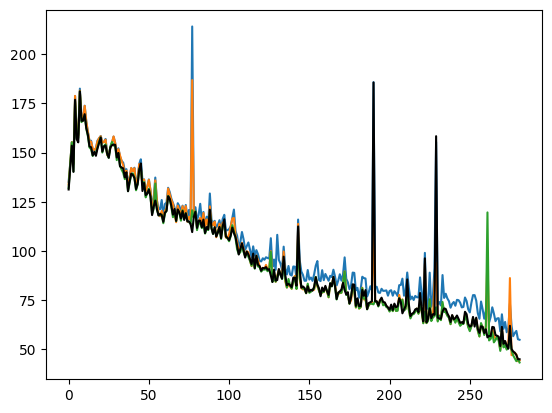

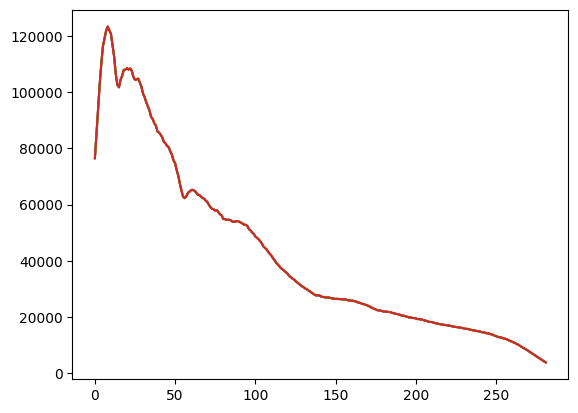

In [8]:
import ariel_load
importlib.reload(ariel_load)

for dd in train_data[:10]:
    loaders = ariel_load.default_loaders()
    loaders[0].cache_steps = []

    d = copy.deepcopy(dd)
    d.load_to_step(3, loaders)
    options = ariel_load.apply_pca_modelOptions()
    options.include_diagnostics = True
    v=[]
    plt.figure()
    plt.imshow(d.transits[0].data[1].data[0,...].get(), aspect='auto', interpolation='none')
    f1=plt.figure()
    f2=plt.figure()
    for nc in range(1,4):
        options.n_components = nc
        weighted_coeffs, residual = ariel_load.apply_pca_model(d.transits[0].data[1].data, np.arange(1,283), options)
        #r = weighted_coeffs/kgs.rms(weighted_coeffs)
        #_,ax = plt.subplots(1,2,figsize=(12,6))
        #plot_scaled(weighted_coeffs)
        #v.append(ariel_numerics.estimate_noise_cp(weighted_coeffs).get())
        # plt.figure()
        # plt.imshow(cp.mean(residual.get(),0), aspect='auto', interpolation='none')
        # plt.colorbar()
        # plt.title(nc)
        # plt.clim([-200,200])
        plt.figure(f1)
        plt.plot(ariel_numerics.estimate_noise_cp(weighted_coeffs).get())
        plt.figure(f2)
        plt.plot(cp.mean(weighted_coeffs,0).get())
    d.load_to_step(5, loaders)   
    # plot_scaled(d.transits[0].data[0].data)   
    # v.append(ariel_numerics.estimate_noise_cp(d.transits[0].data[0].data).get())
    # plt.figure()
    # plt.plot(v)
    plt.figure(f1)
    plt.plot(ariel_numerics.estimate_noise_cp(d.transits[0].data[1].data).get(), color='black')    
    plt.figure(f2)
    plt.plot(cp.mean(d.transits[0].data[1].data,0).get())
    plt.pause(0.001)